# Bean Leaf Classification

In [1]:
import tensorflow as tf
tf.__version__

2023-12-14 17:02:41.053429: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


'2.9.1'

In [19]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [12]:
import matplotlib.pyplot as plt 

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [10]:
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.0 MB/s eta 0:00:00


## Load Data and Simple EDA

### Download dataset

In [11]:
!gdown --id '1zyce3Y661pJ82PfCe0Kp93N2-Nkz1Var' 

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1zyce3Y661pJ82PfCe0Kp93N2-Nkz1Var
From (redirected): https://drive.google.com/uc?id=1zyce3Y661pJ82PfCe0Kp93N2-Nkz1Var&confirm=t&uuid=6e11a7ff-6d94-4e48-a584-3b2355843501
To: /home/jovyan/workspace/bean-leaf-lesions-classification/data.zip
100%|████████████████████████████████████████| 163M/163M [00:08<00:00, 19.9MB/s]


In [12]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/train/
   creating: data/val/
   creating: data/train/healthy/
  inflating: __MACOSX/data/train/._healthy  
   creating: data/train/angular_leaf_spot/
  inflating: __MACOSX/data/train/._angular_leaf_spot  
   creating: data/train/bean_rust/
  inflating: __MACOSX/data/train/._bean_rust  
   creating: data/val/healthy/
  inflating: __MACOSX/data/val/._healthy  
   creating: data/val/angular_leaf_spot/
  inflating: __MACOSX/data/val/._angular_leaf_spot  
   creating: data/val/bean_rust/
  inflating: __MACOSX/data/val/._bean_rust  
  inflating: data/train/healthy/healthy_train.265.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.265.jpg  
  inflating: data/train/healthy/healthy_train.271.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.271.jpg  
  inflating: data/train/healthy/healthy_train.259.jpg  
  inflating: __MACOSX/data/tr

  inflating: __MACOSX/data/train/healthy/._healthy_train.165.jpg  
  inflating: data/train/healthy/healthy_train.171.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.171.jpg  
  inflating: data/train/healthy/healthy_train.4.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.4.jpg  
  inflating: data/train/healthy/healthy_train.38.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.38.jpg  
  inflating: data/train/healthy/healthy_train.10.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.10.jpg  
  inflating: data/train/healthy/healthy_train.213.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.213.jpg  
  inflating: data/train/healthy/healthy_train.207.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.207.jpg  
  inflating: data/train/healthy/healthy_train.211.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.211.jpg  
  inflating: data/train/healthy/healthy_train.205.jpg  
  inflating: __MACOSX/da

  inflating: data/train/healthy/healthy_train.180.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.180.jpg  
  inflating: data/train/healthy/healthy_train.194.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.194.jpg  
  inflating: data/train/healthy/healthy_train.143.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.143.jpg  
  inflating: data/train/healthy/healthy_train.157.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.157.jpg  
  inflating: data/train/healthy/healthy_train.156.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.156.jpg  
  inflating: data/train/healthy/healthy_train.142.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.142.jpg  
  inflating: data/train/healthy/healthy_train.195.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.195.jpg  
  inflating: data/train/healthy/healthy_train.181.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.181.jpg  
  inflating: dat

  inflating: data/train/healthy/healthy_train.108.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.108.jpg  
  inflating: data/train/healthy/healthy_train.134.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.134.jpg  
  inflating: data/train/healthy/healthy_train.135.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.135.jpg  
  inflating: data/train/healthy/healthy_train.121.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.121.jpg  
  inflating: data/train/healthy/healthy_train.109.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.109.jpg  
  inflating: data/train/healthy/healthy_train.337.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.337.jpg  
  inflating: data/train/healthy/healthy_train.40.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.40.jpg  
  inflating: data/train/healthy/healthy_train.54.jpg  
  inflating: __MACOSX/data/train/healthy/._healthy_train.54.jpg  
  inflating: data/tr

  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.3.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.309.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.309.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.296.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.296.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.282.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.282.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.255.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.255.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.241.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.241.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.269.jpg  
  inflating: __MACOSX/da

  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.157.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.157.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.143.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.143.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.29.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.29.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.341.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.341.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.221.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.221.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.235.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.235.jpg  
  inflating: data/train/

  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.175.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.175.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.37.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.37.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.149.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.149.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.217.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.217.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.203.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.203.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.202.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.202.jpg  
  inflating: data/train/

  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.92.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.79.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.79.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.45.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.45.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.107.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.107.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.113.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.113.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.51.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.51.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.339.jpg  
  inflating: __MACOSX/data/tr

  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.57.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.57.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.43.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.43.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.101.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.101.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.129.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.129.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.317.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.317.jpg  
  inflating: data/train/angular_leaf_spot/angular_leaf_spot_train.303.jpg  
  inflating: __MACOSX/data/train/angular_leaf_spot/._angular_leaf_spot_train.303.jpg  
  inflating: data/train/an

  inflating: data/train/bean_rust/bean_rust_train.11.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.11.jpg  
  inflating: data/train/bean_rust/bean_rust_train.117.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.117.jpg  
  inflating: data/train/bean_rust/bean_rust_train.103.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.103.jpg  
  inflating: data/train/bean_rust/bean_rust_train.7.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.7.jpg  
  inflating: data/train/bean_rust/bean_rust_train.39.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.39.jpg  
  inflating: data/train/bean_rust/bean_rust_train.315.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.315.jpg  
  inflating: data/train/bean_rust/bean_rust_train.301.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.301.jpg  
  inflating: data/train/bean_rust/bean_rust_train.329.jpg  
  inflating: __MACOSX/data/trai

  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.254.jpg  
  inflating: data/train/bean_rust/bean_rust_train.268.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.268.jpg  
  inflating: data/train/bean_rust/bean_rust_train.233.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.233.jpg  
  inflating: data/train/bean_rust/bean_rust_train.227.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.227.jpg  
  inflating: data/train/bean_rust/bean_rust_train.347.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.347.jpg  
  inflating: data/train/bean_rust/bean_rust_train.145.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.145.jpg  
  inflating: data/train/bean_rust/bean_rust_train.43.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.43.jpg  
  inflating: data/train/bean_rust/bean_rust_train.57.jpg  
  inflating: __MACOSX/data/train/bean_rust/._bean_rust_train.57.jpg  
  inflating: dat

  inflating: data/val/healthy/healthy_val.3.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.3.jpg  
  inflating: data/val/healthy/healthy_val.2.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.2.jpg  
  inflating: data/val/healthy/healthy_val.14.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.14.jpg  
  inflating: data/val/healthy/healthy_val.28.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.28.jpg  
  inflating: data/val/healthy/healthy_val.29.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.29.jpg  
  inflating: data/val/healthy/healthy_val.15.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.15.jpg  
  inflating: data/val/healthy/healthy_val.17.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.17.jpg  
  inflating: data/val/healthy/healthy_val.16.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_val.16.jpg  
  inflating: data/val/healthy/healthy_val.12.jpg  
  inflating: __MACOSX/data/val/healthy/._healthy_

  inflating: data/val/bean_rust/bean_rust_val.32.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.32.jpg  
  inflating: data/val/bean_rust/bean_rust_val.33.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.33.jpg  
  inflating: data/val/bean_rust/bean_rust_val.27.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.27.jpg  
  inflating: data/val/bean_rust/bean_rust_val.6.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.6.jpg  
  inflating: data/val/bean_rust/bean_rust_val.4.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.4.jpg  
  inflating: data/val/bean_rust/bean_rust_val.19.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.19.jpg  
  inflating: data/val/bean_rust/bean_rust_val.31.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.31.jpg  
  inflating: data/val/bean_rust/bean_rust_val.25.jpg  
  inflating: __MACOSX/data/val/bean_rust/._bean_rust_val.25.jpg  
  inflating: data/val/bean_rust/bean

### load sample image

angular leaf spot image

In [30]:
angular_train_dir_path = './data/train/angular_leaf_spot'
name = 'angular_leaf_spot_train.0.jpg'
fullname = f'{angular_train_dir_path}/{name}'
img_angular = load_img(fullname)

bean rust image

In [31]:
bean_rust_train_dir_path = './data/train/bean_rust'
name = 'bean_rust_train.0.jpg'
fullname = f'{bean_rust_train_dir_path}/{name}'
img_bean_rust = load_img(fullname)

healthy image

In [32]:
healthy_train_dir_path = './data/train/healthy'
name = 'healthy_train.0.jpg'
fullname = f'{healthy_train_dir_path}/{name}'
img_healthy = load_img(fullname)

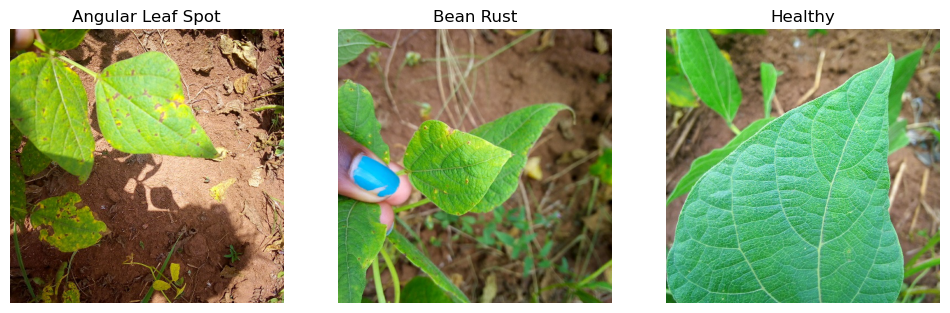

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(img_angular)
axes[0].set_title("Angular Leaf Spot")
axes[0].axis("off")

axes[1].imshow(img_bean_rust)
axes[1].set_title("Bean Rust")
axes[1].axis("off")

axes[2].imshow(img_healthy)
axes[2].set_title("Healthy")
axes[2].axis("off")

plt.show()

In [41]:
img = load_img(fullname)
x = np.array(img)
print("Image Resolution:")
x.shape

Image Resolution:


(500, 500, 3)

In [20]:
def count_files(directory):
    try:
        # List all files in the directory
        files = os.listdir(directory)

        # Count the number of files
        num_files = len(files)

        return num_files

    except FileNotFoundError:
        print(f"Directory '{directory}' not found.")
        return None

In [33]:
angular_val_dir_path = './data/val/angular_leaf_spot'
bean_rust_val_dir_path = './data/val/bean_rust'
healthy_val_dir_path = './data/val/healthy'


angular_train_count = count_files(angular_train_dir_path)
bean_rust_train_count = count_files(bean_rust_train_dir_path)
healthy_train_count = count_files(healthy_train_dir_path)

angular_val_count = count_files(angular_val_dir_path)
bean_rust_val_count = count_files(bean_rust_val_dir_path)
healthy_val_count = count_files(healthy_val_dir_path)

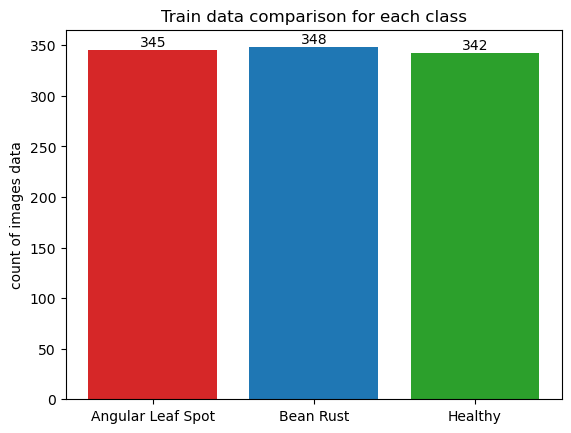

In [40]:
fig, ax = plt.subplots()

classes = ['Angular Leaf Spot', 'Bean Rust', 'Healthy']
counts = [angular_train_count, bean_rust_train_count, healthy_train_count]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(classes, counts, color=bar_colors)

for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

ax.set_ylabel('count of images data')
ax.set_title('Train data comparison for each class')

plt.show()

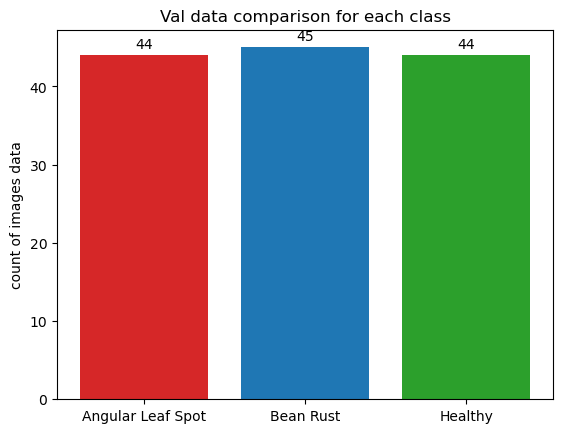

In [39]:
fig, ax = plt.subplots()

classes = ['Angular Leaf Spot', 'Bean Rust', 'Healthy']
counts = [angular_val_count, bean_rust_val_count, healthy_val_count]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(classes, counts, color=bar_colors)

for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

ax.set_ylabel('count of images data')
ax.set_title('Val data comparison for each class')

plt.show()

From the EDA, we can see for all classes relatively have equal number of images data. so here we will not do any additional step , such as upsampling or undersampling